<a href="https://colab.research.google.com/github/SriharshaAmma/LibraryDocumentation-ShadowFox/blob/main/T20_Cricket_Perforance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**T20 CRICKET FIELDING PERFORMING ANALYSIS**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load csv into a Data Frame**

In [28]:
import pandas as pd

# Upload again in Colab if not already
from google.colab import files
uploaded = files.upload()

# Use the exact file name
df = pd.read_csv('IPL sample data - Sheet1.csv', encoding='ISO-8859-1', skiprows=4)

# Clean column names
df.columns = df.columns.str.strip()

# Rename important columns
df.rename(columns={
    'Player Name': 'Player',
    'Pick': 'Pick',
    'Throw': 'Throw',
    'Runs': 'Runs',
    'Position': 'Position'
}, inplace=True)

# Drop empty rows
df.dropna(how='all', inplace=True)

# Display relevant fielding data
df[['Player', 'Position', 'Pick', 'Throw', 'Runs']].head()


Saving IPL sample data - Sheet1.csv to IPL sample data - Sheet1 (3).csv


,Player,Position,Pick,Throw,Runs
0,Rilee russouw,Short mid wicket,n,NaN,1
1,Phil Salt,wicket keeper,Y,Y,NaN
2,Yash Dhull,covers,Y,Y,NaN
3,Axer Patel,point,Y,Y,NaN
4,NaN,NaN,NaN,NaN,NaN


**Clean NaNs and Normalize Text**

In [29]:
# Drop rows with no player name
df = df.dropna(subset=['Player'])

# Normalize lowercase for consistency
df.loc[:, 'Pick'] = df['Pick'].str.lower().str.strip()
df.loc[:, 'Throw'] = df['Throw'].str.lower().str.strip()
df.loc[:, 'Runs'] = pd.to_numeric(df['Runs'], errors='coerce').fillna(0)



**Scoring Logic**

In [30]:
def fielding_score(row):
    score = 0
    if row['Pick'] == 'y':
        score += 1
    elif row['Pick'] == 'n':
        score -= 2

    if row['Throw'] == 'y':
        score += 1

    # Assume lower runs = better fielding
    score += (0 - row['Runs'])  # penalize if runs were given
    return score

df['Score'] = df.apply(fielding_score, axis=1)


**Player-wise Performance Summary**

In [31]:
# Total score per player
player_scores = df.groupby('Player')['Score'].sum().sort_values(ascending=False).reset_index()

# Display scores
player_scores.columns = ['Player', 'Total Fielding Score']
player_scores


,Player,Total Fielding Score
0,Kuldeep yadav,3.0
1,Lalit yadav,3.0
2,Axer Patel,2.0
3,Yash Dhull,2.0
4,Phil Salt,2.0
5,Aman Khan,2.0
6,0,0.0
7,Catches (C),0.0
8,2,0.0
9,1,-3.0


**Visualization**

/tmp/ipython-input-32-3797298691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=player_scores, x='Total Fielding Score', y='Player', palette='crest')


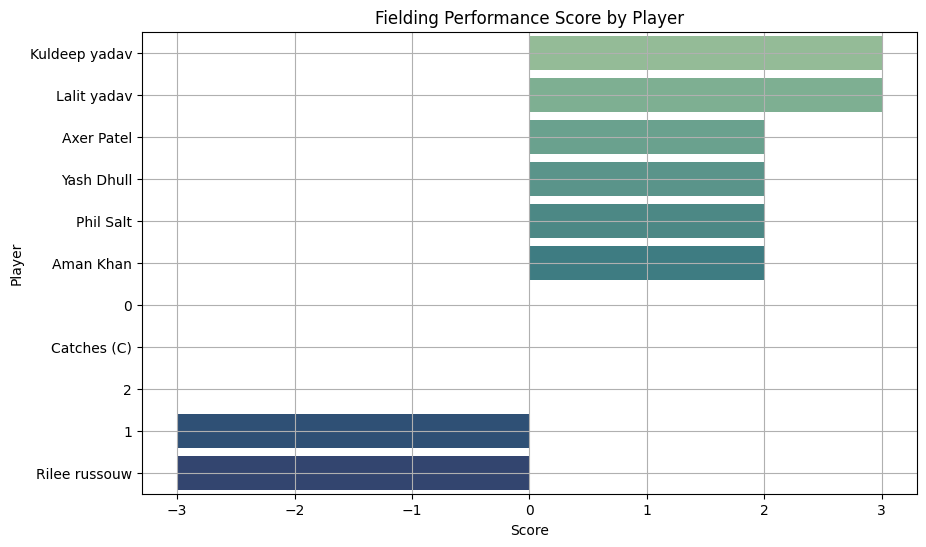

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=player_scores, x='Total Fielding Score', y='Player', palette='crest')
plt.title('Fielding Performance Score by Player')
plt.xlabel('Score')
plt.ylabel('Player')
plt.grid(True)
plt.show()


**Advanced Fielding Visualizations**

**We'll add:**

**✅ Pick & Throw Accuracy per Player**

**✅ Runs Conceded vs Saved**

**✅ Heatmap of Fielding Actions**

**✅ Radar Chart (Optional, for 3 selected players)**

**Pick & Throw Accuracy Bar Charts**

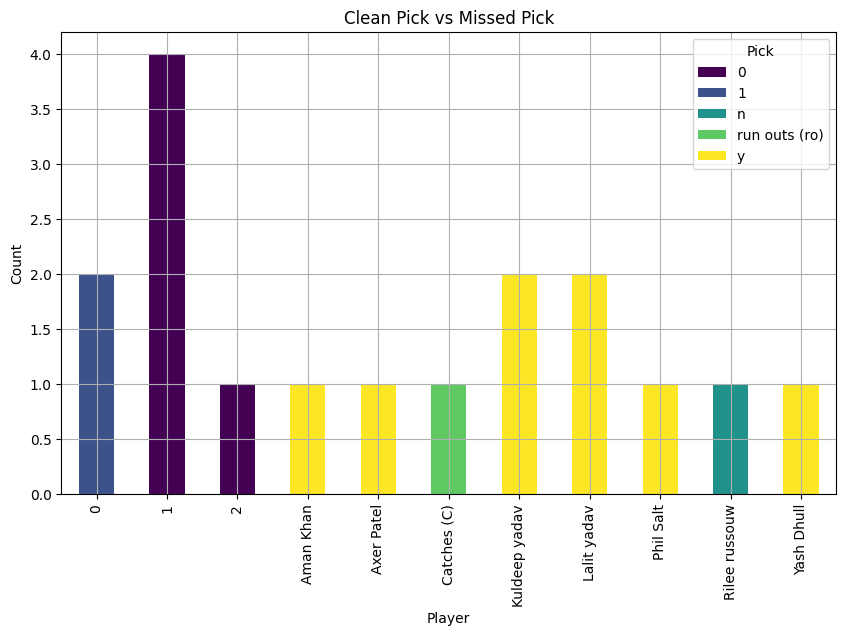

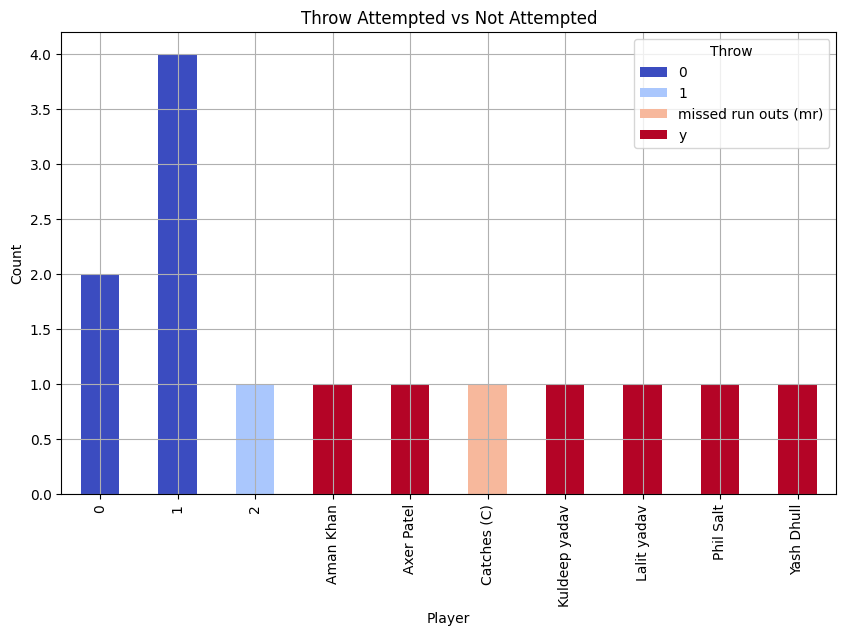

In [33]:
# Pick Accuracy
pick_acc = df.groupby(['Player', 'Pick']).size().unstack(fill_value=0)
pick_acc.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Clean Pick vs Missed Pick')
plt.xlabel('Player')
plt.ylabel('Count')
plt.legend(title='Pick')
plt.grid(True)
plt.show()

# Throw Accuracy
throw_acc = df.groupby(['Player', 'Throw']).size().unstack(fill_value=0)
throw_acc.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Throw Attempted vs Not Attempted')
plt.xlabel('Player')
plt.ylabel('Count')
plt.legend(title='Throw')
plt.grid(True)
plt.show()


**Runs Conceded vs Saved**

/tmp/ipython-input-21-3040569058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_data.values, y=runs_data.index, palette='flare')


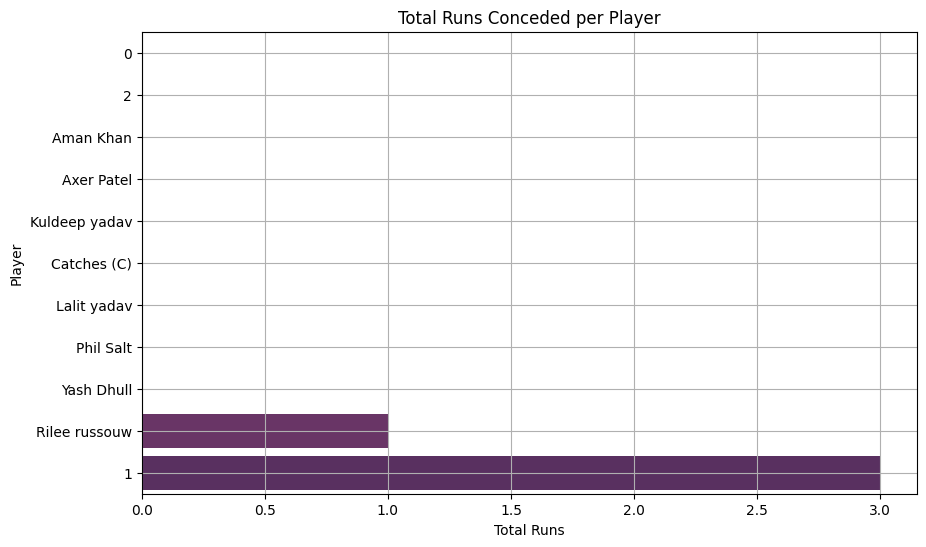

In [21]:
runs_data = df.groupby('Player')['Runs'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=runs_data.values, y=runs_data.index, palette='flare')
plt.title('Total Runs Conceded per Player')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.grid(True)
plt.show()


**Heatmap: Pick vs Throw Frequency**

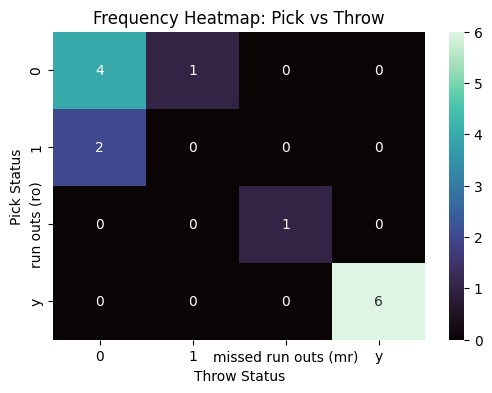

In [22]:
heatmap_data = pd.crosstab(df['Pick'], df['Throw'])

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, cmap='mako', fmt='d')
plt.title('Frequency Heatmap: Pick vs Throw')
plt.xlabel('Throw Status')
plt.ylabel('Pick Status')
plt.show()


**Radar Chart for 3 Players**

In [23]:
# Select top 3 fielders
top_players = df['Player'].value_counts().head(3).index.tolist()

# Radar stats: mean per player
radar_df = df[df['Player'].isin(top_players)].groupby('Player').agg({
    'Score': 'sum',
    'Runs': 'sum',
    'Pick': lambda x: (x == 'y').sum(),
    'Throw': lambda x: (x == 'y').sum()
}).rename(columns={'Pick': 'Clean Picks', 'Throw': 'Throws'})

radar_df


,Score,Runs,Clean Picks,Throws
Player,,,,
0,0.0,0.0,0,0
1,-3.0,3.0,0,0
Lalit yadav,3.0,0.0,2,1


**Fielding Position Map**

/tmp/ipython-input-24-3548907604.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=position_counts, x='Count', y='Position', palette='cubehelix')


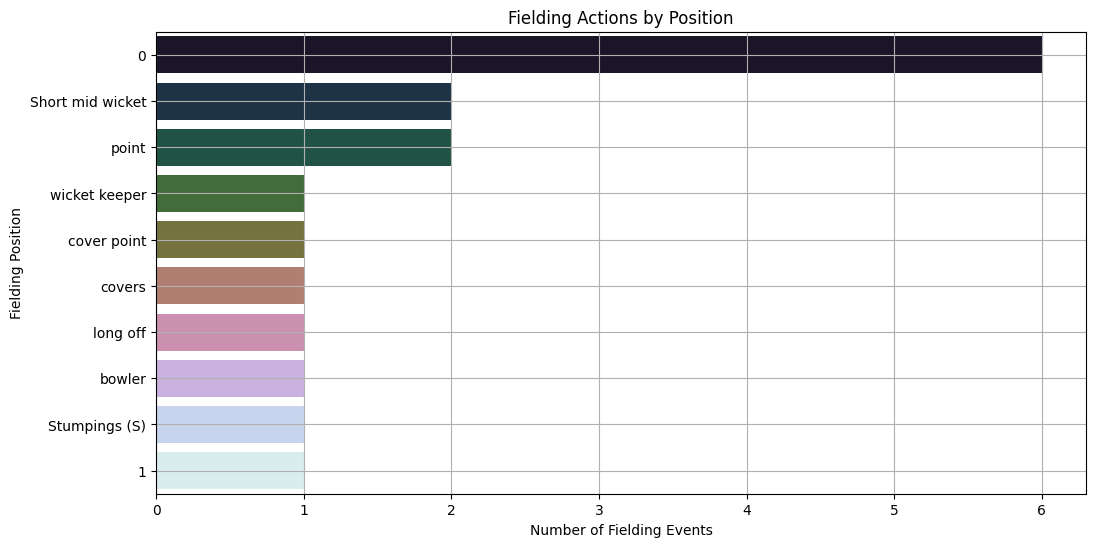

In [24]:
# Count actions per fielding position
position_counts = df['Position'].value_counts().reset_index()
position_counts.columns = ['Position', 'Count']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=position_counts, x='Count', y='Position', palette='cubehelix')
plt.title('Fielding Actions by Position')
plt.xlabel('Number of Fielding Events')
plt.ylabel('Fielding Position')
plt.grid(True)
plt.show()


**Player Efficiency Score**

In [25]:
# Count number of events per player
event_count = df['Player'].value_counts().reset_index()
event_count.columns = ['Player', 'Events']

# Merge with score data
efficiency_df = df.groupby('Player')['Score'].sum().reset_index()
efficiency_df = efficiency_df.merge(event_count, on='Player')
efficiency_df['Efficiency Score'] = (efficiency_df['Score'] / efficiency_df['Events']).round(2)

# Sort and show
efficiency_df = efficiency_df.sort_values(by='Efficiency Score', ascending=False)
efficiency_df


,Player,Score,Events,Efficiency Score
10,Yash Dhull,2.0,1,2.00
4,Axer Patel,2.0,1,2.00
3,Aman Khan,2.0,1,2.00
8,Phil Salt,2.0,1,2.00
7,Lalit yadav,3.0,2,1.50
6,Kuldeep yadav,3.0,2,1.50
0,0,0.0,2,0.00
5,Catches (C),0.0,1,0.00
2,2,0.0,1,0.00
1,1,-3.0,4,-0.75


/tmp/ipython-input-26-1839953230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Efficiency Score', y='Player', data=efficiency_df, palette='viridis')


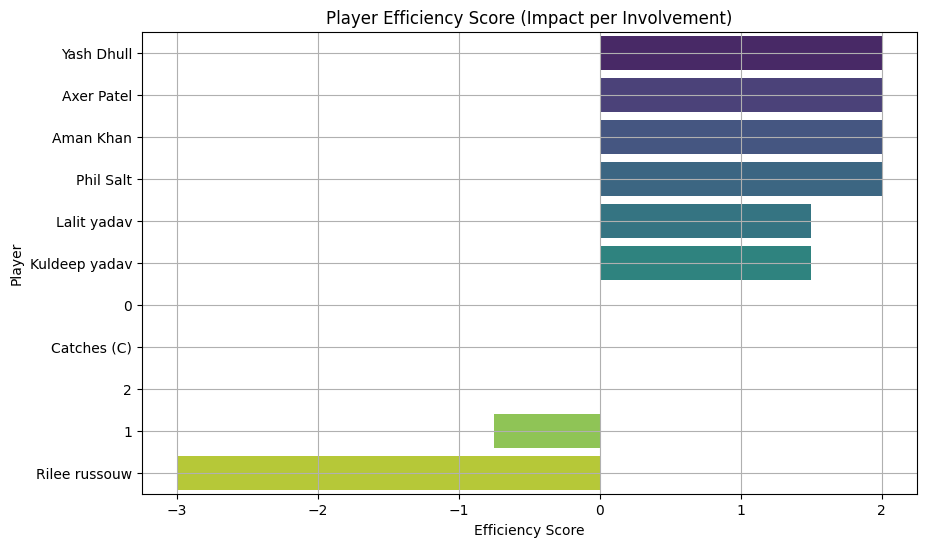

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Efficiency Score', y='Player', data=efficiency_df, palette='viridis')
plt.title('Player Efficiency Score (Impact per Involvement)')
plt.xlabel('Efficiency Score')
plt.ylabel('Player')
plt.grid(True)
plt.show()
